##  Multiple Linear Regression Model

### Importing the required Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Reading the data 

In [2]:
df = pd.read_csv('measurements.csv') # load the dataset using pandas

In [3]:
df.head(5) # inspect the top five row of the data set

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.shape # checks the numbe rof rows and column

(388, 12)

In [5]:
df.info() # check the dtat type of each column and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


### Cleaning The data 

**Drop alert** - Columns containing all NULL values can be dropped as they have no effect on any other parameters

In [6]:
df.isnull().sum() # check the number of missing values

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [7]:
df = df.drop(columns=['specials','refill liters','refill gas'], axis = 1) # drop irrevelant columns
df.head(5) # top five rows of data set


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [8]:
# replace the comma in the data set with dot in distance, consume, temp_inside column
df['distance']=df['distance'].str.replace(',','.')
df['consume']=df['consume'].str.replace(',','.')
df['temp_inside']=df['temp_inside'].str.replace(',','.')
df.head(5)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [9]:
# cange the data ype from object to float
df['distance']=df['distance'].astype(float)
df['consume']=df['consume'].astype(float)
df['temp_inside']=df['temp_inside'].astype(float)

In [10]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [11]:
df['temp_inside']=df['temp_inside'].fillna(21.929521) # fill the null values in temp_inside with the mean of temp_inside

In [12]:
df.isnull().sum() # checkn for null

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

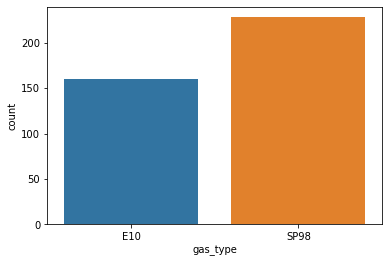

In [13]:
sns.countplot(x='gas_type', data=df) # visulalise vaalue count of gas_type column
plt.show()

In [14]:
df['gas_type']=df['gas_type'].map({'E10':1, 'SP98':0}) # map E10 to 0 and SP98 t0 1
df['gas_type']=df['gas_type'].astype(int)

In [15]:
df.corr() # shows the correllection table for the data set

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,0.053411,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.015327,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,0.097360,-0.035408,0.009489,0.081618
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,-0.010198,0.297376,-0.036937,0.242248
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,-0.148705,0.167562,-0.186315,0.346903
gas_type,0.053411,0.015327,0.097360,-0.010198,-0.148705,1.000000,-0.105285,-0.060328,-0.022761
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,-0.105285,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,-0.060328,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,-0.022761,0.088598,-0.112650,1.000000


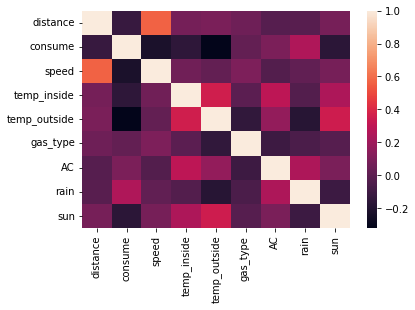

In [16]:
sns.heatmap(df.corr())
plt.show()

### Getting the data ready

In [17]:
x = df.drop(columns='consume') #  drop the target column


In [18]:
y = df['consume'] # target column


### Data Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(x)

StandardScaler()

In [22]:
x = scaler.transform(x)

### Creating the data model

In [23]:
from sklearn.model_selection import train_test_split 

#### Splitting the data 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # split dataset to both train and test

### models
- **Linear Regression Model**
- **Support Vector Machines (SVMs) for Regression**
- **Random Forest Regression**
- **Gradient Boosting regression**


In [25]:
# import ml model ==> try out for regression model for the best with accurracy
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
# loading the model
lr = LinearRegression()
sr = SVR()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [27]:
# training the model
lr.fit(x_train, y_train)
sr.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)

GradientBoostingRegressor()

#### Predicting Values for Train datset

In [28]:
# make prediction with trained model
lr_prediction = lr.predict(x_test)
sr_prediction = sr.predict(x_test)
rf_prediction = rf.predict(x_test)
gb_prediction = gb.predict(x_test)

**The table shows the actual values and the predicted values**

In [29]:
#make a data frame and compare actual value with model prediction
preddf=pd.DataFrame({
    'actual':y_test,
    'lr_prediction': lr_prediction,
    'sr_prediction': sr_prediction,
    'rf_prediction': rf_prediction,
    'gb_prediction': gb_prediction
})
preddf.head(5)

,actual,lr_prediction,sr_prediction,rf_prediction,gb_prediction
271,5.6,4.746925,4.776022,5.407,5.190473
46,5.1,5.184706,5.059739,5.347,5.257272
167,6.1,5.106448,4.899749,5.071,5.283508
42,4.6,5.166519,4.970101,4.567,4.720584
349,4.3,4.519662,4.178783,4.170,4.203845


**The graph shows the actual values and the predicted values**

<function matplotlib.pyplot.show(close=None, block=None)>

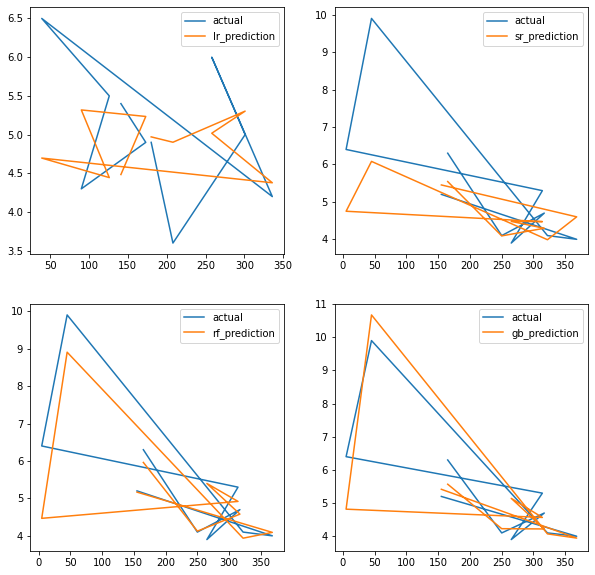

In [30]:
# visualisation of prediction with actual values
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(preddf['actual'].iloc[40:50], label='actual')
plt.plot(preddf['lr_prediction'].iloc[40:50], label='lr_prediction')
plt.legend()

plt.subplot(222)
plt.plot(preddf['actual'].iloc[60:70], label='actual')
plt.plot(preddf['sr_prediction'].iloc[60:70], label='sr_prediction')
plt.legend()

plt.subplot(223)
plt.plot(preddf['actual'].iloc[60:70], label='actual')
plt.plot(preddf['rf_prediction'].iloc[60:70], label='rf_prediction')
plt.legend()

plt.subplot(224)
plt.plot(preddf['actual'].iloc[60:70], label='actual')
plt.plot(preddf['gb_prediction'].iloc[60:70], label='gb_prediction')
plt.legend()

plt.show

### Evaluation of the Model

In [31]:
from sklearn import metrics

**R2 (coefficient of determination) regression score function. Best possible score is 1.0**

In [32]:
# evaluating with mean saqure the higher the better 
lr_r2=metrics.r2_score(y_test, lr_prediction)
sr_r2=metrics.r2_score(y_test, sr_prediction)
rf_r2=metrics.r2_score(y_test, rf_prediction)
gb_r2=metrics.r2_score(y_test, gb_prediction)

In [33]:
print(f'lr_r2: {lr_r2} \nsr_r2: {sr_r2} \nrf_r2: {rf_r2} \ngb_r2: {gb_r2}')

lr_r2: 0.09442245405200766 
sr_r2: 0.2819625114304313 
rf_r2: 0.5601882912952342 
gb_r2: 0.3572477644228702


**The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.**

In [34]:
 # evaluating with abosulute mean score 
lr_mae=metrics.mean_absolute_error(y_test, lr_prediction)
sr_mae=metrics.mean_absolute_error(y_test, sr_prediction)
rf_mae=metrics.mean_absolute_error(y_test, rf_prediction)
gb_mae=metrics.mean_absolute_error(y_test, gb_prediction)

In [35]:
print(f'lr_mae: {lr_mae} \nsr_mae: {sr_mae} \nrf_mae: {rf_mae} \ngb_mae: {gb_mae}')

lr_mae: 0.6596955284395749 
sr_mae: 0.5652372510072062 
rf_mae: 0.42163112535612557 
gb_mae: 0.48694473011738326


**The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss**

In [36]:
lr_mse=metrics.mean_squared_error(y_test, lr_prediction)
sr_mse=metrics.mean_squared_error(y_test, sr_prediction)
rf_mse=metrics.mean_squared_error(y_test, rf_prediction)
gb_mse=metrics.mean_squared_error(y_test, gb_prediction)

In [37]:
print(f'lr_mse: {lr_mse} \nsr_mse: {sr_mse} \nrf_mse: {rf_mse} \ngb_mse: {gb_mse}')

lr_mse: 0.8216359849622316 
sr_mse: 0.6514797565382067 
rf_mse: 0.39904382357589474 
gb_mse: 0.5831729911238555


*Conclusion** : The R2 value , MAE Value and the MSE are for random forest regression are 0.51, 0.43, 0.43 respectivly  which is quite ok compared to other model . This means that the model make most accurate predictions

### Best model

In [38]:
# slecting the best model and training with enteir dataset
rf = RandomForestRegressor()
rf.fit(x, y)

RandomForestRegressor()

### Saving model

In [39]:
import joblib

In [40]:
joblib.dump(rf, 'joblib_rf') # saving the trained mode


['joblib_rf']

In [41]:
model = joblib.load('joblib_rf')

### GUI

In [42]:
from tkinter import *

In [43]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    
    model = joblib.load('joblib_rf')
    input_data = (p1,p2,p3,p4,p5,p6,p7,p8)
    
    arrayed_input_data = np.asarray(input_data)
    
    reshaped_arrayed_input_data = arrayed_input_data.reshape(1, -1)
    
    standard_data = scaler.transform(reshaped_arrayed_input_data)
    
    result = model.predict(standard_data)
    
    Label(master, text = 'Fuel Consumption: ', fg = 'black', font=('Impact',10, 'bold')).grid(row=10)
    Label(master, text = result, fg = 'green', font=('Impact',14, 'bold') ).grid(row=10, column=11)




master = Tk()
master.geometry("400x300")
master.title('Fuel Consumption Prediction')
label1 = Label(master, text='Fuel Consumption Prediction', bg = 'navy', fg = 'white')
label1.grid(row=0, columnspan=2)
label2 = Label(master, text='Distance')
label2.grid(row=1)
label3 = Label(master, text='Speed')
label3.grid(row=2)
label4 = Label(master, text='Temp_inside')
label4.grid(row=3)
label5 = Label(master, text='Temp_outside')
label5.grid(row=4)
label6 = Label(master, text='E10 or SP98 [1/0]')
label6.grid(row=5)
label7 = Label(master, text='AC or Not [1/0]')
label7.grid(row=6)
label8 = Label(master, text='Raining or Not [1/0]')
label8.grid(row=7)
label9 = Label(master, text='Sunny or Not [1/0]')
label9.grid(row=8)

e1=Entry(master)
e1.grid(row=1, column=1)
e2=Entry(master)
e2.grid(row=2, column=1)
e3=Entry(master)
e3.grid(row=3, column=1)
e4=Entry(master)
e4.grid(row=4, column=1)
e5=Entry(master)
e5.grid(row=5, column=1)
e6=Entry(master)
e6.grid(row=6, column=1)
e7=Entry(master)
e7.grid(row=7, column=1)
e8=Entry(master)
e8.grid(row=8, column=1)


Button(master, text='Predict', bg = 'navy', fg = 'white', relief=RIDGE, command = show_entry).grid()

mainloop()